# Regresión Lineal: Predicción de Precios de Autos

Una tarea bastante común en el contexto de Machine Learning es la predicción de una variable según algunos descriptores. En esta ocasión partiremos de un dataset que involucra ocho variables (algunas numéricas, otras categóricas) y el precio de un automóvil, el cual se desea estimar empleando un modelo de regresión lineal.

El objetivo de este cuaderno es que usted aprenda:
- Algunas maneras de lidiar con descriptores categóricos no-numéricos.
- Uso de la librería Pandas para manejar datos tabulares en formato .csv.
- Uso de la librería Scikit Learn para preprocesamiento y entrenamiento de un modelo de regresión lineal.
- Funcionamiento e implementación del algoritmo Descenso de Gradiente Estocástico para un modelo lineal básico.

Debe completar las celdas vacías y seguir las instrucciones anotadas en el cuaderno.

La fecha límite de entrega es el día **9 de septiembre** y se realizará a través de Bloque Neón.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import sklearn
from sklearn.preprocessing import OrdinalEncoder, MinMaxScaler, RobustScaler
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('carDataset/toyota.csv')
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,GT86,2016,16000,Manual,24089,Petrol,265,36.2,2.0
1,GT86,2017,15995,Manual,18615,Petrol,145,36.2,2.0
2,GT86,2015,13998,Manual,27469,Petrol,265,36.2,2.0
3,GT86,2017,18998,Manual,14736,Petrol,150,36.2,2.0
4,GT86,2017,17498,Manual,36284,Petrol,145,36.2,2.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6738 entries, 0 to 6737
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         6738 non-null   object 
 1   year          6738 non-null   int64  
 2   price         6738 non-null   int64  
 3   transmission  6738 non-null   object 
 4   mileage       6738 non-null   int64  
 5   fuelType      6738 non-null   object 
 6   tax           6738 non-null   int64  
 7   mpg           6738 non-null   float64
 8   engineSize    6738 non-null   float64
dtypes: float64(2), int64(4), object(3)
memory usage: 473.9+ KB


Podemos observar algunas categorías numéricas, y otras de tipo _object_ (string).

In [4]:
categ = ['model','year','transmission','fuelType','engineSize']
str_categ = ['model','transmission','fuelType']
numer = ['price','mileage','tax','mpg']

## Parte 1

A continuación se realizó el ajuste de los datos para un modelo de regresión lineal definido mediante la librería SciKit-Learn. Se observan dos métricas de precisión, en este caso Error Cuadrático Medio (RMSE) y $R^2$ (puede leer más sobre esta métrica en [ScikitLearn: r2_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html)). Se le entregarán los dos primeros casos como ejemplo, usted debe implementar los demás a partir de estos primeros.

#### Casos:

- Caso 1: Codificación One-Hot (MinMaxScaler)
- Caso 2: Codificación Ordinal (MinMaxScaler)
- Caso 3: Codificación One-Hot (RobustScaler)
- Caso 4: Codificación Ordinal (RobustScaler)
- Caso 5: Entrenar con un 30% (Codificación Ordinal, MinMaxScaler)
- Caso 6: Entrenar con un 55% (Codificación Ordinal, MinMaxScaler)
- Caso 7: Entrenar con un 80% (Codificación Ordinal, MinMaxScaler)

Analice los resultados.

### Caso 1:

#### Codificación One-Hot

Una de las formas de codificar categorías no numéricas se conoce como _one-hot encoding_, en donde se crea una columna para cada valor distinto que exista en la característica que estamos codificando y, para cada registro, marcar con un 1 la columna a la que pertenezca dicho registro y dejar las demás con 0.

Igualmente, en este caso se realizará un escalamiento de los datos utilizando un `MinMaxScaler`, investigue más sobre esta función en: [ScikitLearn: MinMaxScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html).

In [5]:
df_ohe = pd.get_dummies(df)
scaler = MinMaxScaler()
df_scl_ohe = scaler.fit_transform(df_ohe)
df_scl_ohe = pd.DataFrame(df_scl_ohe, columns = df_ohe.columns)
df_scl_ohe.head()

,year,price,mileage,tax,mpg,engineSize,model_ Auris,model_ Avensis,model_ Aygo,model_ C-HR,...,model_ Verso-S,model_ Yaris,transmission_Automatic,transmission_Manual,transmission_Other,transmission_Semi-Auto,fuelType_Diesel,fuelType_Hybrid,fuelType_Other,fuelType_Petrol
0,0.818182,0.256150,0.138100,0.469027,0.143842,0.444444,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.863636,0.256066,0.106716,0.256637,0.143842,0.444444,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.772727,0.222301,0.157479,0.469027,0.143842,0.444444,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.863636,0.306839,0.084476,0.265487,0.143842,0.444444,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.863636,0.281478,0.208019,0.256637,0.143842,0.444444,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


#### Separación de Datos

In [6]:
X = df_scl_ohe.drop(['price'], axis=1)
y = df_scl_ohe['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=22)

In [7]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

model_1 = LinearRegression()

model_1.fit(X_train, y_train)
preds = model_1.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, preds))
rs = model_1.score(X_test, y_test)
print(f'RMSE: {round(rmse,3)}')
print(f'R^2: {round(rs,3)}\n')

RMSE: 0.031
R^2: 0.917



A partir de las métricas obtenidas se concluye que el modelo tuvo un buen desempeño. Respecto al RMSE, su valor es cercano a cero, lo cual se relaciona con una diferencia baja entre los valores reales y los estimados. Además, el $R^2$ es cercano a 1, es decir, el modelo tiene un buen ajuste a los datos.

### Caso 2

#### Codificación Ordinal

In [8]:
oe = OrdinalEncoder()
df_oe = df.copy()
df_oe[str_categ] = oe.fit_transform(df_oe[str_categ])

x = df_oe.values #returns a numpy array
min_max_scaler = MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df_scl_oe = pd.DataFrame(x_scaled, columns=df_oe.columns)
df_scl_oe.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,0.352941,0.818182,0.256150,0.333333,0.138100,1.0,0.469027,0.143842,0.444444
1,0.352941,0.863636,0.256066,0.333333,0.106716,1.0,0.256637,0.143842,0.444444
2,0.352941,0.772727,0.222301,0.333333,0.157479,1.0,0.469027,0.143842,0.444444
3,0.352941,0.863636,0.306839,0.333333,0.084476,1.0,0.265487,0.143842,0.444444
4,0.352941,0.863636,0.281478,0.333333,0.208019,1.0,0.256637,0.143842,0.444444


#### Separación de Datos

In [9]:
X = df_scl_oe.drop(['price'], axis=1)
y = df_scl_oe['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=22)

In [10]:
model_2 = LinearRegression()

model_2.fit(X_train, y_train)
preds = model_2.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, preds))
rs = model_2.score(X_test, y_test)
print(f'RMSE: {round(rmse,3)}')
print(f'R^2: {round(rs,3)}\n')

RMSE: 0.05
R^2: 0.787



En primer lugar el valor del error cuadrático medio es cercano a cero, lo cual se relaciona con una diferencia baja entre los valores reales y los estimados. Sin embargo, el $R^2$ se aleja de 1, es decir, el modelo se ajusta a los datos, pero no es el mejor ajuste.

### Caso 3

#### Codificación One-Hot

In [11]:
df_ohe = pd.get_dummies(df)
scaler = RobustScaler()
df_scl_ohe = scaler.fit_transform(df_ohe)
df_scl_ohe = pd.DataFrame(df_scl_ohe, columns = df_ohe.columns)
df_scl_ohe.head()

,year,price,mileage,tax,mpg,engineSize,model_ Auris,model_ Avensis,model_ Aygo,model_ C-HR,...,model_ Verso-S,model_ Yaris,transmission_Automatic,transmission_Manual,transmission_Other,transmission_Semi-Auto,fuelType_Diesel,fuelType_Hybrid,fuelType_Other,fuelType_Petrol
0,-0.5,0.776286,0.257936,0.896552,-1.955882,0.625,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.775541,0.004718,0.068966,-1.955882,0.625,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-1.0,0.477703,0.414289,0.896552,-1.955882,0.625,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.223415,-0.174718,0.103448,-1.955882,0.625,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.999702,0.822056,0.068966,-1.955882,0.625,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Separación de Datos

In [12]:
X = df_scl_ohe.drop(['price'], axis=1)
y = df_scl_ohe['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=22)

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

model_3 = LinearRegression()

model_3.fit(X_train, y_train)
preds = model_3.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, preds))
rs = model_3.score(X_test, y_test)
print(f'RMSE: {round(rmse,3)}')
print(f'R^2: {round(rs,3)}\n')

RMSE: 0.277
R^2: 0.917



El cambio en el escalamiento, en comparación con el resultado del caso 1, repercute en el valor del error cuadrático medio. En particular el RMSE se aleja de cero. Es decir, la distancia entre los datos y los estimados aumenta. Respecto al $R^2$ su valor sigue siendo cercano a 1, es decir, el modelo tiene un buen ajuste a los datos.

### Caso 4

#### Codificación Ordinal

In [13]:
oe = OrdinalEncoder()
df_oe = df.copy()
df_oe[str_categ] = oe.fit_transform(df_oe[str_categ])

x = df_oe.values #returns a numpy array
min_max_scaler = RobustScaler()
x_scaled = min_max_scaler.fit_transform(x)
df_scl_oe = pd.DataFrame(x_scaled, columns=df_oe.columns)
df_scl_oe.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,0.066667,-0.5,0.776286,0.0,0.257936,0.0,0.896552,-1.955882,0.625
1,0.066667,0.0,0.775541,0.0,0.004718,0.0,0.068966,-1.955882,0.625
2,0.066667,-1.0,0.477703,0.0,0.414289,0.0,0.896552,-1.955882,0.625
3,0.066667,0.0,1.223415,0.0,-0.174718,0.0,0.103448,-1.955882,0.625
4,0.066667,0.0,0.999702,0.0,0.822056,0.0,0.068966,-1.955882,0.625


#### Separación de Datos

In [14]:
X = df_scl_oe.drop(['price'], axis=1)
y = df_scl_oe['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=22)

model_4 = LinearRegression()

model_4.fit(X_train, y_train)
preds = model_4.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, preds))
rs = model_4.score(X_test, y_test)
print(f'RMSE: {round(rmse,3)}')
print(f'R^2: {round(rs,3)}\n')

RMSE: 0.444
R^2: 0.787



El cambio en el escalamiento, en comparación con el resultado del caso 2, repercute en el valor del error cuadrático medio. En particular el RMSE se aleja de cero. De igual forma que en el caso 2 la métrica  R2  se aleja de uno como consecuencia de la codifiación  Ordinal . Es decir, el modelo no tiene un buen ajuste.

### Caso 5

#### Codificación Ordinal

In [15]:
oe = OrdinalEncoder()
df_oe = df.copy()
df_oe[str_categ] = oe.fit_transform(df_oe[str_categ])

x = df_oe.values #returns a numpy array
min_max_scaler = MinMaxScaler() 
#min_max_scaler = RobustScaler()
x_scaled = min_max_scaler.fit_transform(x)
df_scl_oe = pd.DataFrame(x_scaled, columns=df_oe.columns)
df_scl_oe.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,0.352941,0.818182,0.256150,0.333333,0.138100,1.0,0.469027,0.143842,0.444444
1,0.352941,0.863636,0.256066,0.333333,0.106716,1.0,0.256637,0.143842,0.444444
2,0.352941,0.772727,0.222301,0.333333,0.157479,1.0,0.469027,0.143842,0.444444
3,0.352941,0.863636,0.306839,0.333333,0.084476,1.0,0.265487,0.143842,0.444444
4,0.352941,0.863636,0.281478,0.333333,0.208019,1.0,0.256637,0.143842,0.444444


#### Separación de Datos

In [16]:
X = df_scl_oe.drop(['price'], axis=1)
y = df_scl_oe['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=22)

model_5 = LinearRegression()

model_5.fit(X_train, y_train)
preds = model_5.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, preds))
rs = model_5.score(X_test, y_test)
print(f'RMSE: {round(rmse,3)}')
print(f'R^2: {round(rs,3)}\n')

RMSE: 0.049
R^2: 0.785



### Caso 6

#### Codificación Ordinal

In [17]:
oe = OrdinalEncoder()
df_oe = df.copy()
df_oe[str_categ] = oe.fit_transform(df_oe[str_categ])

x = df_oe.values #returns a numpy array
min_max_scaler = MinMaxScaler() 
#min_max_scaler = RobustScaler()
x_scaled = min_max_scaler.fit_transform(x)
df_scl_oe = pd.DataFrame(x_scaled, columns=df_oe.columns)
df_scl_oe.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,0.352941,0.818182,0.256150,0.333333,0.138100,1.0,0.469027,0.143842,0.444444
1,0.352941,0.863636,0.256066,0.333333,0.106716,1.0,0.256637,0.143842,0.444444
2,0.352941,0.772727,0.222301,0.333333,0.157479,1.0,0.469027,0.143842,0.444444
3,0.352941,0.863636,0.306839,0.333333,0.084476,1.0,0.265487,0.143842,0.444444
4,0.352941,0.863636,0.281478,0.333333,0.208019,1.0,0.256637,0.143842,0.444444


#### Separación de Datos

In [18]:
X = df_scl_oe.drop(['price'], axis=1)
y = df_scl_oe['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.45, random_state=22)

model_6 = LinearRegression()

model_6.fit(X_train, y_train)
preds = model_6.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, preds))
rs = model_6.score(X_test, y_test)
print(f'RMSE: {round(rmse,3)}')
print(f'R^2: {round(rs,3)}\n')

RMSE: 0.05
R^2: 0.784



### Caso 7

#### Codificación Ordinal

In [19]:
oe = OrdinalEncoder()
df_oe = df.copy()
df_oe[str_categ] = oe.fit_transform(df_oe[str_categ])
  
x = df_oe.values #returns a numpy array
min_max_scaler = MinMaxScaler() 
#min_max_scaler = RobustScaler()
x_scaled = min_max_scaler.fit_transform(x)
df_scl_oe = pd.DataFrame(x_scaled, columns=df_oe.columns)
df_scl_oe.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,0.352941,0.818182,0.256150,0.333333,0.138100,1.0,0.469027,0.143842,0.444444
1,0.352941,0.863636,0.256066,0.333333,0.106716,1.0,0.256637,0.143842,0.444444
2,0.352941,0.772727,0.222301,0.333333,0.157479,1.0,0.469027,0.143842,0.444444
3,0.352941,0.863636,0.306839,0.333333,0.084476,1.0,0.265487,0.143842,0.444444
4,0.352941,0.863636,0.281478,0.333333,0.208019,1.0,0.256637,0.143842,0.444444


#### Separación de Datos

In [20]:
X = df_scl_oe.drop(['price'], axis=1)
y = df_scl_oe['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=22)

model_7 = LinearRegression()

model_7.fit(X_train, y_train)
preds = model_7.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, preds))
rs = model_7.score(X_test, y_test)
print(f'RMSE: {round(rmse,3)}')
print(f'R^2: {round(rs,3)}\n')

RMSE: 0.05
R^2: 0.787



## Análisis

En primer lugar, se observo que el ajuste depende de la codificación que se utilice para las variables no númericas. En particular, se reconoció una diferencia en el desempeño de los modelos. Para la codificación $\textit{oneHot}$ se obtuvieron mejores métricas en comparación con la codificación $\textit{Ordinal}$. Es decir, la primera obtuvo un ajuste mas cercano a 1 (ideal).


Por otra parte, se reconoció que el error cuadrático medio (RMSE) depende de la escala que se utiliza. Los modelos con la escala $\textit{MinMaxScaler}$ obvieron valores mas pequeños de la metrica que aquellos que utilizan $\textit{RobustScaler}$.


Respecto a los últimos 3 casos, es decir, aquellos donde se varío el porcentaje de la información para entrenar el modelo. Se identifico que la variación en la cantidad de información no afecta en gran medida el desempeño. En particular, los valores de las métricas se pueden considerar costantes. Lo anterior justificado en la baja variación entre los 3 modelos. Es importante destacar que la variación en las metricas es baja debido a que los 3 casos utilizaron el mismo método para escalar la información ($\textit{MinMaxScaler}$). Para comparar los resultados se implementaron los mismos casos (porcentaje de información) alterando el escalamiento. Usando $\textit{RobustScaler}$ las metricas también conservaron su valor. De hecho, los valores para ambos métodos de escalamiento son cercanos. Lo cual permite concluir el buen desempeño del modelo.

## Parte 2

Ahora usted debe desarrollar su propia implementación del método Descenso de Gradiente estocástico. Para esta ocasión debe utilizar una codificación One-Hot, un RobustScaler y realizar el entrenamiento a partir del 80% de los datos. Al final del entrenamiento, en la lista `errores` se deben tener los valores de la función de error para cada iteración y así poder observar el progreso gráficamente.

In [21]:
df_ohe = pd.get_dummies(df)
scaler = RobustScaler()
df_scl_ohe = scaler.fit_transform(df_ohe)
df_scl_ohe = pd.DataFrame(df_scl_ohe, columns = df_ohe.columns)

X = df_scl_ohe.drop(['price'], axis=1)
y = df_scl_ohe['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=22)

In [31]:
X_train_array = np.c_[np.ones(X_train.values.shape[0]), X_train.values]
y_train_array = y_train.values
X_test_array = np.c_[np.ones(X_test.values.shape[0]), X_test.values]
y_test_array = y_test.values

#Inicialización de w
w0 = np.random.rand(X_train_array.shape[1])# Inicializar aleatoriamente #
w = w0.copy()
#Selección de par aleatorio
i = np.random.randint(0,len(X_train_array)-1) # Posición aleatoria #
xActual = X_train_array[i]
yActual = y_train_array[i]

#Inicialización de criterio de parada
eps = 1e-3 # Se define un criterio de parada basado en el error en la predicción #
error = float('inf') # Valor inicial, se debe actualizar en cada iteración #
dif = float('inf') # Norma del gradiente #

#Inicialización de valor de la tasa de aprendizaje 
tasa = 0.001 # Selección de tasa de aprendizaje #

#Lista para monitorear aprendizaje
# Cada vector contiene el error en cada iteración. Los vectores difieren en la tasa de aprendizaje
#errores = [] # Agregar a esta lista los valores de la función de error en cada iteración #
errores2 = [] # n=0.1
#errores3 = []# n=0.01
#errores4 = []# n=0.001
#errores5 = []# n=0.0001

#Ciclo iterativo según algoritmo de descenso de gradiente
while dif>eps:
    # Desarrollo de algoritmo #
    g = np.dot(w,xActual)
    error = g-yActual
    errores2.append(error)
    w1=w-tasa*error*xActual
    dif=np.linalg.norm(w-w1)
    w=w1
#w2 = w.copy()
#w3 = w.copy() 
#w4 = w.copy() 

#### Evaluación de Modelo

In [32]:
y_train_preds = np.zeros(y_train_array.shape)
for i in range(X_train_array.shape[0]):
    y_train_preds[i] = np.dot(w,X_train_array[i])

y_test_preds = np.zeros(y_test_array.shape)
for i in range(X_test_array.shape[0]):
    y_test_preds[i] = np.dot(w,X_test_array[i])
    
r2_train = r2_score(y_train_array, y_train_preds)
r2_test = r2_score(y_test_array, y_test_preds)
print(f'R2 entrenamiento: {round(r2_train,4)}\nR2 prueba: {round(r2_test,4)}')

R2 entrenamiento: -0.9859
R2 prueba: -1.3711


## Gráfica de Resultados

NameError: name 'errores3' is not defined

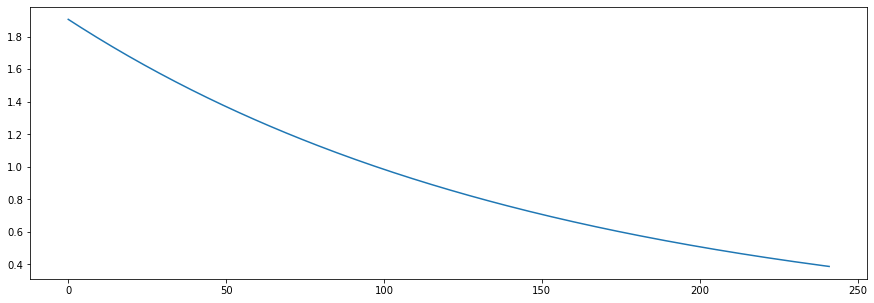

In [33]:
plt.figure(figsize=(15,5))
#plt.plot(errores)
plt.plot(errores2)
plt.plot(errores3)
plt.plot(errores4)
plt.plot(errores5,marker='o')
plt.xlabel('# Iteraciones')
plt.ylabel('Función de Error')
plt.title('Descenso de Gradiente Estocástico')
plt.legend(['$\eta$=0.1','$\eta$=0.01','$\eta$=0.001','$\eta$=0.0001'])

plt.show()

## Análisis 2

En la segunda parte del taller se implemento el algoritmo de gradiente descendiente estocástico. Como consecuencia de la implementación se identifico que la tasa de aprendizaje afecta directamente el desempeño del modelo. En particular, que su valor determina la velocidad de convergencia. En la imagen se observa que para valores pequeños la gráfica tiene baja inclinación. Lo cual se debe a que la diferencia en el vector $W$ entre distintas iteraciones es baja. Es importante mencionar que las gráficas son decrecientes. Es decir, para los valores seleccionados de la tasa de aprendizaje el algoritmo se acerca a una solución del problema. Cabe mencionar que hay valores de la tasa que no garantizan la convergencia. En particular para $\eta = 1$ no hay convergencia, motivo por el cual no se presenta en la gráfica. De igual forma, es necesario mencionar que los algoritmos implementados no convergen a la misma solución (vector $W$) debido a que utilizan diferentes vectores iniciales. Por último, en base a los resultados de la implementación, es decir convergencia y velocidad de convergencia, se estimo que el valor óptimo de la tasa de aprendizaje es $0.1$ debido a que: garantiza la convergencia y su velocidad es baja.